```python
from numpy import uint8, uint16
from pandas import concat, read_csv
from math import floor, log10

_1 = uint8(1)
_2 = {"2": _1, "D": _1, "S": uint8(2)}
_3 = uint8(0)
_4 = uint16(0)
_5 = lambda _6: _2.get(_6.replace(" ", ""), _3)
_7 = lambda _8: uint16(_8.replace(" ", "").replace(",", "")) if _8 else _4
_9 = "DE", "DR", "V"
_10 = {"T": _5, "R": _5, "E": _7, "A": _7, "DE": _7, "DA": _7, "H": _7, "M": _7}
_11 = concat((read_csv(f"R/{_12}.csv", index_col=0, converters=_10) for _12 in _9), keys=_9, names=("RE",))
_13 = _11.iloc[:, :2]
for _14 in _11.columns.to_list()[2:]:
    for _15 in range(floor(log10(_11[_14].max())), -1, -1):
        _13[f'{_14}{_15}'] = (_11[_14].to_numpy() // 10 ** _15 % 10).astype(uint8)

In [1]:
from numpy import uint8, uint16
from pandas import concat, read_csv

UINT8_ONE = uint8(1)
CATEGORY_MAP = {"2": UINT8_ONE, "D": UINT8_ONE, "S": uint8(2)}
UINT8_ZERO = uint8(0)
UINT16_ZERO = uint16(0)
convert_category = lambda value: CATEGORY_MAP.get(value.replace(" ", ""), UINT8_ZERO)
convert_numeric = lambda value: uint16(value.replace(" ", "").replace(",", "")) if value else UINT16_ZERO
CSV_KEYS = "DE", "DR", "V"
CONVERTERS = {
    "T": convert_category,
    "R": convert_category,
    "E": convert_numeric,
    "A": convert_numeric,
    "DE": convert_numeric,
    "DA": convert_numeric,
    "H": convert_numeric,
    "M": convert_numeric
}
df = concat(
    (read_csv(f"R/{key}.csv", index_col=0, converters=CONVERTERS) for key in CSV_KEYS), keys=CSV_KEYS, names=("RE",)
)
df

T  R   E  A  DE    DA     H     M
RE I                                     
DE 1    0  0   0  0   8  2947  1425  4611
   1    0  1   1  0   3  1818     0   650
   1    0  1   2  0   7  4735   487   308
   1    0  2   1  0   3  2078  2748     0
   1    0  2   1  1   3   269  5848   189
...    .. ..  .. ..  ..   ...   ...   ...
V  467  1  0   7  2   4  6453     0  9665
   467  1  1  10  0   5  6272    62  1417
   467  1  1   6  1   7  5267    78    76
   467  1  2   5  1   6  4602  8211   716
   467  1  2   2  5   7  1979  7396   329

[9110 rows x 8 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       9110 non-null   uint8 
 1   R       9110 non-null   uint8 
 2   E       9110 non-null   uint16
 3   A       9110 non-null   uint16
 4   DE      9110 non-null   uint16
 5   DA      9110 non-null   uint16
 6   H       9110 non-null   uint16
 7   M       9110 non-null   uint16
dtypes: uint16(6), uint8(2)
memory usage: 171.3+ KB


In [3]:
from math import floor, log10

result = df.iloc[:, :2]
for col in df.columns.to_list()[2:]:
    for digit_index in range(floor(log10(df[col].max())), -1, -1):
        result[f'{col}{digit_index}'] = (df[col].to_numpy() // 10 ** digit_index % 10).astype(uint8)
result

T  R  E1  E0  A1  A0  DE1  DE0  DA4  DA3  ...  H4  H3  H2  H1  H0  M4  \
RE I                                              ...                           
DE 1    0  0   0   0   0   0    0    8    0    2  ...   0   1   4   2   5   0   
   1    0  1   0   1   0   0    0    3    0    1  ...   0   0   0   0   0   0   
   1    0  1   0   2   0   0    0    7    0    4  ...   0   0   4   8   7   0   
   1    0  2   0   1   0   0    0    3    0    2  ...   0   2   7   4   8   0   
   1    0  2   0   1   0   1    0    3    0    0  ...   0   5   8   4   8   0   
...    .. ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..  ..   
V  467  1  0   0   7   0   2    0    4    0    6  ...   0   0   0   0   0   0   
   467  1  1   1   0   0   0    0    5    0    6  ...   0   0   0   6   2   0   
   467  1  1   0   6   0   1    0    7    0    5  ...   0   0   0   7   8   0   
   467  1  2   0   5   0   1    0    6    0    4  ...   0   8   2   1   1   0   
   467  1  2   0   2   0   5    0    7    0    1  ...   0   7   3   9   6   0   

        M3  M2  M1  M0  
RE I                    
DE 1     4   6   1   1  
   1     0   6   5   0  
   1     0   3   0   8  
   1     0   0   0   0  
   1     0   1   8   9  
...     ..  ..  ..  ..  
V  467   9   6   6   5  
   467   1   4   1   7  
   467   0   0   7   6  
   467   0   7   1   6  
   467   0   3   2   9  

[9110 rows x 23 columns]

In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T       9110 non-null   uint8
 1   R       9110 non-null   uint8
 2   E1      9110 non-null   uint8
 3   E0      9110 non-null   uint8
 4   A1      9110 non-null   uint8
 5   A0      9110 non-null   uint8
 6   DE1     9110 non-null   uint8
 7   DE0     9110 non-null   uint8
 8   DA4     9110 non-null   uint8
 9   DA3     9110 non-null   uint8
 10  DA2     9110 non-null   uint8
 11  DA1     9110 non-null   uint8
 12  DA0     9110 non-null   uint8
 13  H4      9110 non-null   uint8
 14  H3      9110 non-null   uint8
 15  H2      9110 non-null   uint8
 16  H1      9110 non-null   uint8
 17  H0      9110 non-null   uint8
 18  M4      9110 non-null   uint8
 19  M3      9110 non-null   uint8
 20  M2      9110 non-null   uint8
 21  M1      9110 non-null   uint8
 22  M0      9110 n

In [18]:
# reshaped = tuple(result.to_numpy().reshape(-1, result.shape[-1] * 10).T)
# len(reshaped)
reshaped = result.to_numpy().reshape(-1, 10, 23)
reshaped.shape

(911, 10, 23)

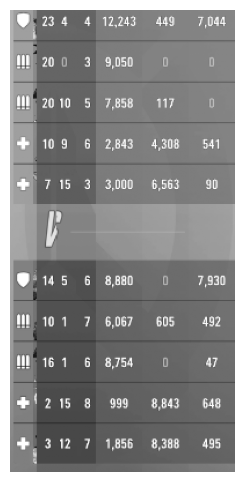

[[0 0 2 3 0 4 0 4 1 2 2 4 3 0 0 4 4 9 0 7 0 4 4]
 [0 1 2 0 0 0 0 3 0 9 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 2 0 1 0 0 5 0 7 8 5 8 0 0 1 1 7 0 0 0 0 0]
 [0 2 1 0 0 9 0 6 0 2 8 4 3 0 4 3 0 8 0 0 5 4 1]
 [0 2 0 7 1 5 0 3 0 3 0 0 0 0 6 5 6 3 0 0 0 9 0]
 [1 0 1 4 0 5 0 6 0 8 8 8 0 0 0 0 0 0 0 7 9 3 0]
 [1 1 1 0 0 1 0 7 0 6 0 6 7 0 0 6 0 5 0 0 4 9 2]
 [1 1 1 6 0 1 0 6 0 8 7 5 4 0 0 0 0 0 0 0 0 4 7]
 [1 2 0 2 1 5 0 8 0 0 9 9 9 0 8 8 4 3 0 0 6 4 8]
 [1 2 0 3 1 2 0 7 0 1 8 5 6 0 8 3 8 8 0 0 4 9 5]]


2025-12-13 01:54:19.025510: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
from pathlib import Path
from tensorflow.random import shuffle
import tensorflow as tf
from tensorflow import gather
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
from matplotlib.pyplot import figure, axis, imshow, show

image_paths = sorted(map(str, Path().rglob('*.png')))

data_count = len(image_paths)
indices = shuffle(tf.range(data_count))
X_shuffled = gather(image_paths, indices)
# y_shuffled = tuple(gather(head, indices) for head in reshaped)
y_shuffled = gather(reshaped, indices)

train_size = int(data_count * .9)
train_X = X_shuffled[:train_size]
val_X = X_shuffled[train_size:]

# train_y = tuple(head[:train_size] for head in y_shuffled)
# val_y = tuple(head[train_size:] for head in y_shuffled)
train_y = y_shuffled[:train_size]
val_y = y_shuffled[train_size:]


def preprocess_image(path, label):
    """PNG 이미지 파일을 읽고 필요한 부분을 추출 및 리사이즈."""
    image = decode_png(read_file(path), channels=1)[230:930, 530:1370]
    # 필요한 HUD 영역만 선택
    hud_parts = [
        image[:, :40], image[:, 390:420], image[:, 450:480],
        image[:, 500:530], image[:, 570:640], image[:, 670:740], image[:, 770:]
    ]
    cropped = tf.concat(hud_parts, axis=1)
    resized = resize(cropped, (400, 194)) / 255
    return resized, label


def make_dataset(X, y, shuffle=False, batch_size=32):
    ds = Dataset.from_tensor_slices((X, y))
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)  # 이미지 전처리
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds


train_ds = make_dataset(train_X, train_y, shuffle=True)
val_ds = make_dataset(val_X, val_y, shuffle=False)
for x_batch, y_batch in train_ds.take(1):
    figure(figsize=(6, 6))
    axis('off')
    imshow(x_batch[0], 'gray')
    show()
    # print(*[tensor[0].numpy() for tensor in y_batch], sep=' ')
    print(y_batch[0].numpy())

In [32]:
input_shape = x_batch.shape[1:]
output_shape = reshaped.shape[1:]
input_shape, output_shape

(TensorShape([400, 194, 1]), (10, 23))

In [51]:
patch_size = input_shape[0] // output_shape[0], input_shape[1] // output_shape[1]
patch_size

(40, 8)

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

def vit_grid_ocr(
    image_size=x_batch.shape[1:],
    patch_size=patch_size,
    embed_dim=256,
    num_heads=8,
    num_layers=6,
    num_classes=10
):

    H, W, C = image_size
    P = patch_size
    
    num_rows = H // P[0]
    num_cols = W // P[1]
    seq_len = num_rows * num_cols

    inputs = Input(shape=image_size)

    # 1) Patch embedding (Conv로 대체: Patchify + Linear)
    x = Conv2D(embed_dim, kernel_size=P, strides=P, padding='valid')(inputs)
    # shape: (batch, num_rows, num_cols, embed_dim)

    # Flatten patches into sequence
    x = Reshape((seq_len, embed_dim))(x)

    # 2) 2D positional embedding
    pos_emb = tf.Variable(
        tf.random.normal([1, seq_len, embed_dim]),
        trainable=True
    )
    x = x + pos_emb

    # 3) Transformer Encoder blocks
    for _ in range(num_layers):
        # Multi-head self-attention
        attn_out = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
        x = LayerNormalization()(x + attn_out)

        # Feed forward
        ff = Dense(embed_dim * 4, activation='gelu')(x)
        ff = Dense(embed_dim)(ff)
        x = LayerNormalization()(x + ff)

    # 4) restore 2D grid
    x = Reshape((num_rows, num_cols, embed_dim))(x)

    # 5) Classification head per grid cell
    outputs = Dense(num_classes)(x)

    model = Model(inputs, outputs)
    return model

In [57]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPool2D, SpatialDropout2D, Flatten, Dropout, Dense
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy

clear_session()

model = vit_grid_ocr()
model.compile('adamw', SparseCategoricalCrossentropy(True), metrics=('accuracy',))
model.summary()

ValueError: The total size of the tensor must be unchanged. Received: input_shape=(10, 25, 256), target_shape=(240, 256)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 콜백 설정
early_stop = EarlyStopping(patience=8, verbose=1, restore_best_weights=True)

# 학습
history = model.fit(
    train_ds,
    epochs=256,
    callbacks=early_stop,
    validation_data=val_ds
)

ValueError: Arguments `target` and `output` must have the same shape up until the last dimension: target.shape=(None, 10, 23), output.shape=(None, 10, 24, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


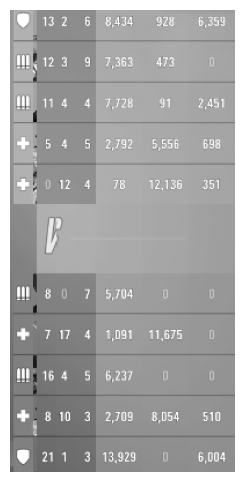

In [38]:
from numpy import array

for x_batch, y_batch in val_ds.take(1):
    x_sample = x_batch[0:1]
    y_sample = tuple(y[0] for y in y_batch)
    y_pred = model.predict(x_sample)
    figure(figsize=(6, 6))
    axis('off')
    imshow(x_batch[0], 'gray')
    show()

In [40]:
print(*[tensor[0].numpy() for tensor in y_batch])
print()
print(*[int(y.argmax()) for y in y_pred])

0 1 1 3 0 2 0 6 0 8 4 3 4 0 0 9 2 8 0 6 3 5 9 0 2 1 2 0 3 0 9 0 7 3 6 3 0 0 4 7 3 0 0 0 0 0 0 2 1 1 0 4 0 4 0 7 7 2 8 0 0 0 9 1 0 2 4 5 1 0 3 0 5 0 4 0 5 0 2 7 9 2 0 5 5 5 6 0 0 6 9 8 0 3 0 0 1 2 0 4 0 0 0 7 8 1 2 1 3 6 0 0 3 5 1 1 2 0 8 0 0 0 7 0 5 7 0 4 0 0 0 0 0 0 0 0 0 0 1 3 0 7 1 7 0 4 0 1 0 9 1 1 1 6 7 5 0 0 0 0 0 1 2 1 6 0 4 0 5 0 6 2 3 7 0 0 0 0 0 0 0 0 0 0 1 3 0 8 1 0 0 3 0 2 7 0 9 0 8 0 5 4 0 0 5 1 0 1 1 2 1 0 1 0 3 1 3 9 2 9 0 0 0 0 0 0 6 0 0 4

0 1 1 3 0 3 0 0 0 6 1 1 3 0 0 0 0 0 0 4 6 8 8 0 2 0 4 0 1 0 1 0 4 5 7 6 0 0 0 0 0 0 0 0 0 0 0 2 0 8 0 0 0 8 0 4 6 6 7 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 1 0 0 3 6 0 0 0 0 7 0 0 0 0 0 0 0 3 0 0 0 0 0 4 0 1 0 4 2 0 6 7 6 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 4 2 5 6 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0
